In [1]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import scipy
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

In [2]:
t0 = time.time()
data_dir = '../data/'
file = 'df_item_transaction.csv'
df_item_transaction = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  0.9754838943481445


In [17]:
df_per_country = \
pd.DataFrame(df_item_transaction.groupby('Country')['InvoiceNo'].nunique()).reset_index().rename(columns={'InvoiceNo': '#ofTransactions'})

df_per_country['#ofCustomers'] = \
pd.DataFrame(df_item_transaction.groupby('Country')['CustomerID'].nunique()).reset_index()['CustomerID']

df_per_country['Transaction/Customer'] = \
df_per_country['#ofTransactions'] / df_per_country['#ofCustomers']

df_per_country = df_per_country.set_index('Country')

In [18]:
display(df_per_country.head(3))

,#ofTransactions,#ofCustomers,Transaction/Customer
Country,,,
Australia,56,9,6.222222
Austria,17,11,1.545455
Bahrain,3,2,1.500000


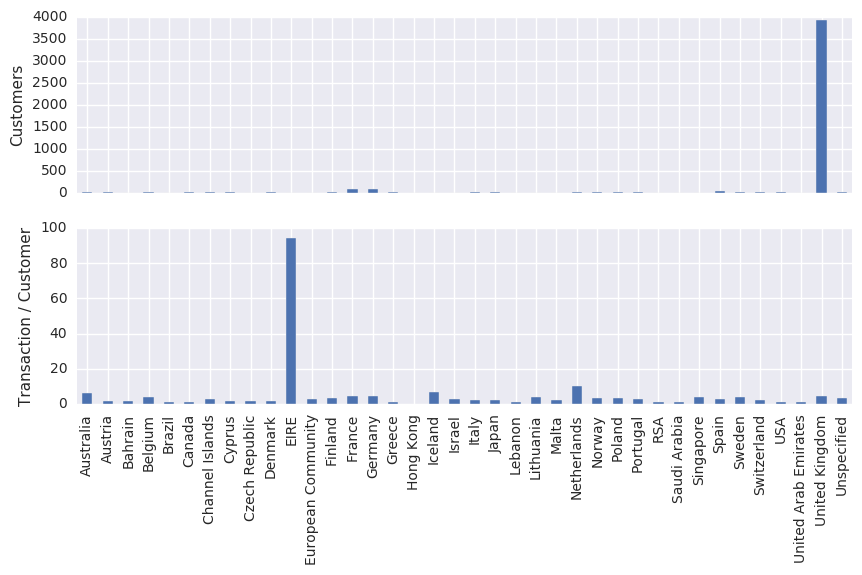

In [25]:
figsize = (10, 5)
fig, (ax2, ax3) = plt.subplots(nrows=2, ncols=1, figsize=figsize, sharex=True)

df_per_country['#ofCustomers'].plot(kind='bar', ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Customers')

df_per_country['Transaction/Customer'].plot(kind='bar', ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('Transaction / Customer')

plt.show()